In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

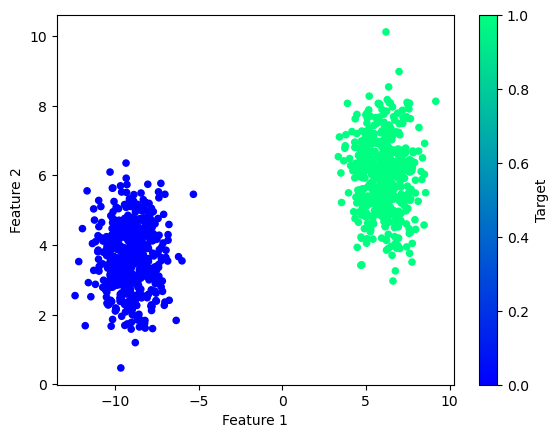

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
### Train and Test a Basic Neural Network

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6263 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 960us/step - loss: 0.5595 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 938us/step - loss: 0.5467 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 738us/step - loss: 0.5203 - accuracy: 1.0000
Epo

24/24 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 980us/step - loss: 0.0943 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0868 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 1.0000
Epoch 92/10

<AxesSubplot:>

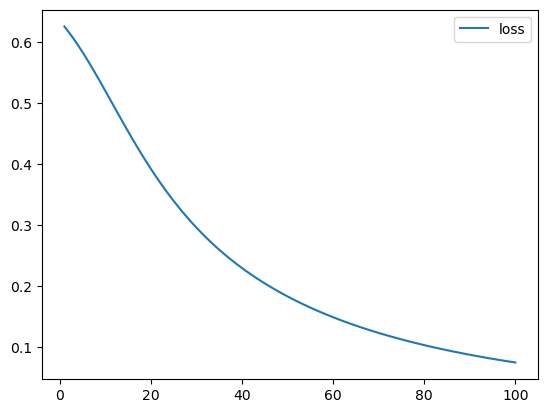

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

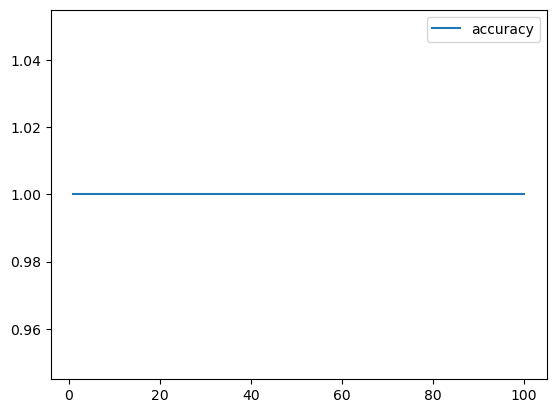

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0690 - accuracy: 1.0000 - 115ms/epoch - 14ms/step
Loss: 0.06895306706428528, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 49ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

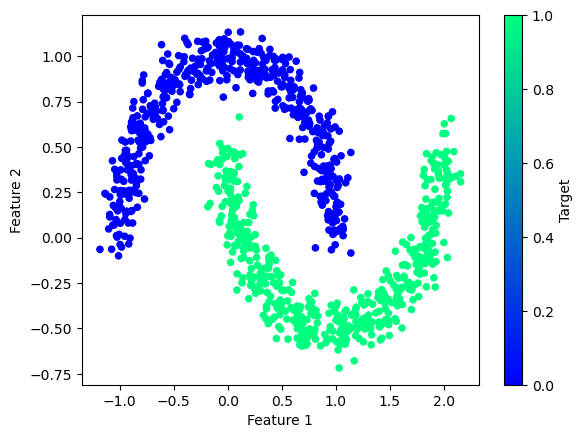

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1072 - accuracy: 0.4587
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9753 - accuracy: 0.4880
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8895 - accuracy: 0.5107
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8319 - accuracy: 0.5253
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7889 - accuracy: 0.5493
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.5613
Epoch 7/100
24/24 [==============================] - 0s 927us/step - loss: 0.7275 - accuracy: 0.5707
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.5853
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5907
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.5987
Epoch 1

24/24 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.8733
Epoch 83/100
24/24 [==============================] - 0s 817us/step - loss: 0.2858 - accuracy: 0.8733
Epoch 84/100
24/24 [==============================] - 0s 845us/step - loss: 0.2847 - accuracy: 0.8733
Epoch 85/100
24/24 [==============================] - 0s 872us/step - loss: 0.2837 - accuracy: 0.8733
Epoch 86/100
24/24 [==============================] - 0s 844us/step - loss: 0.2826 - accuracy: 0.8733
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8733
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8733
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8733
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8760
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.8773
Epoch

<AxesSubplot:>

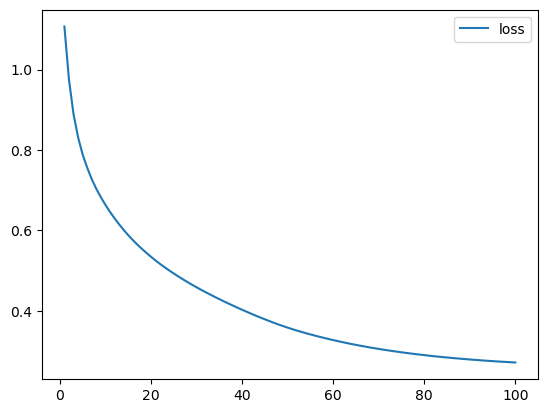

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

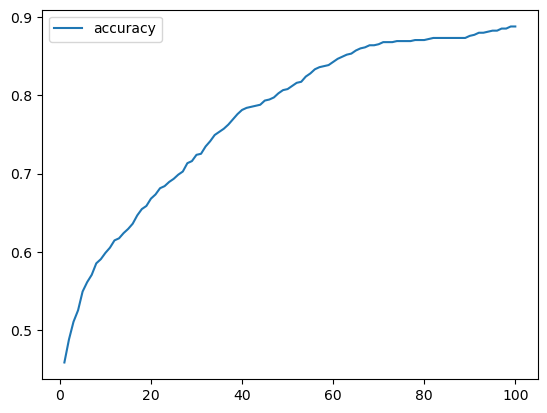

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Sequential model

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5307
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2528 - accuracy: 0.9200
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.9200
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.9213
Epoch 86/100
24/24 [==============================] - 0s 812us/step - loss: 0.2448 - accuracy: 0.9240
Epoch 87/100
24/24 [==============================] - 0s 903us/step - loss: 0.2421 - accuracy: 0.9240
Epoch 88/100
24/24 [==============================] - 0s 832us/step - loss: 0.2395 - accuracy: 0.9253
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9267
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.9267
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.9267
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0